In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine,euclidean

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [277]:
# function from x to y
def f1_1(x):
    # 1d input
    return 5*x + 3 - 10*np.random.normal(5,5,1) 

def f1_2(x):
    # 1d input, x-square
    return 5*x*x + 3 - 10*np.random.normal(5,5,1) 

def f2_1(x, threshold=100):
    # 2d input with discreate output
    if x[0] > threshold and x[1] < threshold: return 1
    else: return 0

In [10]:
def euclidean_distance(X_train, X_test):
    """
    X-train is nXp matrix, X_test is mXp matrix
    compute pairwise distance for X_test
    return mXn matrix
    """
    n,p= X_train.shape
    m,p= X_test.shape
    
    distances = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            distances[i,j] = euclidean(X_test[i],X_train[j])
    return distances

def cosine_distance(X_train, X_test):
    """
    only when x>= 2D input
    X-train is nXp matrix, X_test is mXp matrix
    compute pairwise distance for X_test
    return mXn matrix
    """
    assert X_train.shape[1] >= 2
    assert X_test.shape[1] >= 2
    n,p= X_train.shape
    m,p= X_test.shape
    
    distances = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            distances[i,j] = cosine(X_test[i],X_train[j])
    return distances

In [11]:
# knn
def get_smallest_index(myList):
    # also remove the smallest value from myList
    if len(myList) == 0: return None
    else:
        # O(n)
        smallest_val = float('inf')
        smallest_index = None
        for i, val in enumerate (myList):
            if val < smallest_val:
                smallest_val = val
                smallest_index = i
        return smallest_index
    
# get top k smallest index
def get_smallest_k_index_array(myList, k):
    # we do not need to sort the whole list, only get the smallest k 
    # find the smallest O(n), find the next smallest O(n-1) ... ,O(n-k+1) , k iteration
    # total time complexity is O(nk)
    # when tie, random get one or pick the first
    smallest_k_index = []
    for i in range(1,k+1): # k iteration, O(nk), worse case if k=n, O(n^2), should then sort 
        smallest_index = get_smallest_index(myList) #O(n)
        smallest_k_index.append(smallest_index) #O(1)
        myList = np.delete(myList, smallest_index) #O(n), iterate all the space by index
    return smallest_k_index

def get_k_nearest_y(distances, y_train, k):
    """
    distance is mXn matrix
    return mXk matrix with k smallest distance y for each m
    """
    m,n = distances.shape
    m_top_k_y = []
    for i in range(m):
        d = distances[i] #1-D
        index = get_smallest_k_index_array(d, k) # use sort directly is k = n, np.argsort(d)[:k] 
        top_k_y = y_train[index]
        m_top_k_y.append(top_k_y)
    return np.array(m_top_k_y)

def knn(X_train, X_test, y_train, k = 1, distance ='euclidean',is_regression=True):
    # return predicted value for each X_test
    # mX1 
    if distance == 'euclidean':
        distances = euclidean_distance(X_train, X_test)
    elif distance == 'cosine':
        distances = cosine_distance(X_train, X_test)
    else:
        print ("unknown distance term")
    m_top_k_y = get_k_nearest_y(distances, y_train, k)
    
    if is_regression:
        # if y_train is continuous, get mean
        m_top_k_y_pred = np.mean(m_top_k_y, axis=1)
    else:
    # if y_train is discrate, get mode
        m_top_k_y_pred = stats.mode(m_top_k_y,axis=1)[0].reshape(len(X_test),1)
    return m_top_k_y_pred

def mse_k(X_train, X_test, y_train, y_test, k = 1, distance ='euclidean',is_regression=True):
    y_pred_test = knn(X_train, X_test, y_train, k = k)
    MSE_test =  (np.square(y_pred_test - y_test)).mean(axis=0)
    return MSE_test

# 1. 1-D input, continuous output

## 1) y is linear to x, small sample

In [75]:
train_size = 10
test_size = 1

X_train1 = np.sort(np.random.normal(100, 80, train_size)).reshape(-1,1)
y_train1 = np.array([f1_1(x) for x in X_train1])
X_test1 = np.sort(np.random.normal(100, 80, test_size)).reshape(-1,1)
y_test1 = np.array([f1_1(x) for x in X_test1])

y_pred_test_k1 = knn(X_train1, X_test1, y_train1, k = 1, distance ='euclidean',is_regression=True)
y_pred_test_k2 = knn(X_train1, X_test1, y_train1, k = 2, distance ='euclidean',is_regression=True)

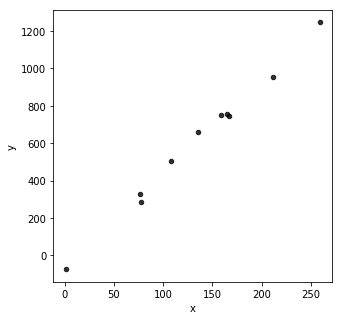

In [78]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train1, y_train1, c ='black', s=20, alpha=0.8)

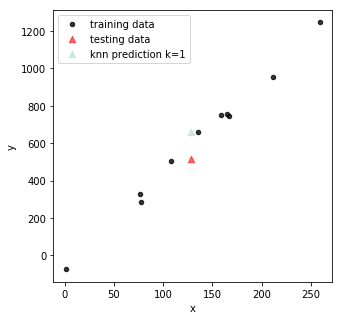

In [376]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train1, y_train1, c ='black', s=20, alpha=0.8)
plt.scatter(X_test1, y_test1, c ='red', marker = "^", s=40,alpha=0.6)
plt.scatter(X_test1, y_pred_test_k1, c ='lightblue', marker = "^", s=40,alpha=0.6)
plt.legend(['training data','testing data','knn prediction k=1'])

Text(0.5, 1.0, 'knn prediction, N(train) = 10, N(test)=1')

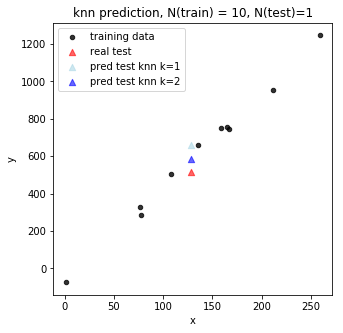

In [96]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train1, y_train1, c ='black', s=20, alpha=0.8)
plt.scatter(X_test1, y_test1, c ='red', marker = "^", s=40,alpha=0.6)
plt.scatter(X_test1, y_pred_test_k1, c ='lightblue', marker = "^", s=40,alpha=0.6)
plt.scatter(X_test1, y_pred_test_k2, c ='blue', marker = "^", s=40,alpha=0.6)
plt.legend(['training data','real test','pred test knn k=1','pred test knn k=2'])
plt.title("knn prediction, N(train) = 10, N(test)=1")

## 2) y is linear to x, large sample

In [88]:
train_size = 80
test_size = 20

X_train2 = np.sort(np.random.normal(100, 80, train_size)).reshape(-1,1)
y_train2 = np.array([f1_1(x) for x in X_train2])
X_test2 = np.sort(np.random.normal(100, 80, test_size)).reshape(-1,1)
y_test2 = np.array([f1_1(x) for x in X_test2])

In [89]:
errors = []
ks = range(1,10)
for k in ks:
    error = mse_k(X_train2, X_test2, y_train2, y_test2, k = k, distance ='euclidean',is_regression=True)
    errors.append(error)

Text(0.5, 1.0, 'Prediction error changes with K in KNN. N(train)=80, N(test)=20')

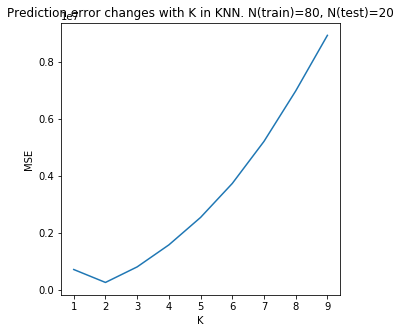

In [379]:
plt.xlabel('K')
plt.ylabel('MSE')
plt.plot(ks,errors)
plt.title('Prediction error changes with K in KNN. N(train)=80, N(test)=20')

Text(0.5, 1.0, 'knn prediction, N(train) = 80, N(test)=20')

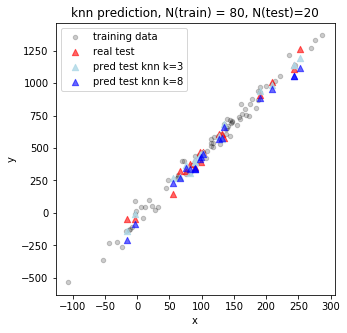

In [95]:
y_pred_test_k21 = knn(X_train2, X_test2, y_train2, k = 3, distance ='euclidean',is_regression=True)
y_pred_test_k22 = knn(X_train2, X_test2, y_train2, k = 8, distance ='euclidean',is_regression=True)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train2, y_train2, c ='black', s=20, alpha=0.2)
plt.scatter(X_test2, y_test2, c ='red', marker = "^", s=40,alpha=0.6)
plt.scatter(X_test2, y_pred_test_k21, c ='lightblue', marker = "^", s=40,alpha=0.8)
plt.scatter(X_test2, y_pred_test_k22, c ='blue', marker = "^", s=40,alpha=0.6)
plt.legend(['training data','real test','pred test knn k=3','pred test knn k=8'])
plt.title("knn prediction, N(train) = 80, N(test)=20")

## 3) linear to x square small sample

In [ ]:
train_size = 20
test_size = 1

X_train3 = np.sort(np.random.normal(0, 80, train_size)).reshape(-1,1)
y_train3 = np.array([f1_2(x) for x in X_train3])
X_test3 = np.sort(np.random.normal(20, 80, test_size)).reshape(-1,1)
y_test3 = np.array([f1_2(x) for x in X_test3])

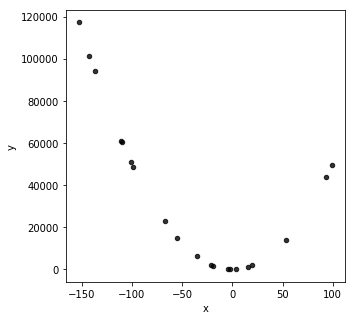

In [209]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train3, y_train3, c ='black', s=20, alpha=0.8)

Text(0.5, 1.0, 'knn prediction, N(train) = 10, N(test)=1')

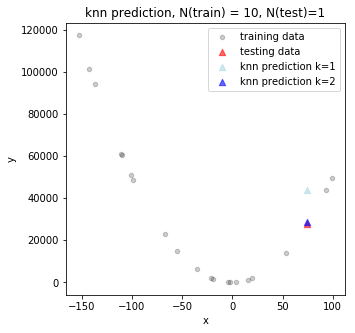

In [375]:
y_pred_test_k31 = knn(X_train3, X_test3, y_train3, k = 1, distance ='euclidean',is_regression=True)
y_pred_test_k32 = knn(X_train3, X_test3, y_train3, k = 2, distance ='euclidean',is_regression=True)
# y_pred_test_k33 = knn(X_train3, X_test3, y_train3, k = 3, distance ='euclidean',is_regression=True)

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train3, y_train3, c ='black', s=20, alpha=0.2)
plt.scatter(X_test3, y_test3, c ='red', marker = "^", s=40,alpha=0.6)
plt.scatter(X_test3, y_pred_test_k31, c ='lightblue', marker = "^", s=40,alpha=0.6)
plt.scatter(X_test3, y_pred_test_k32, c ='blue', marker = "^", s=40, alpha=0.6)
# plt.scatter(X_test3, y_pred_test_k33, c ='darkblue', marker = "^", s=40, alpha=0.6)

plt.legend(['training data','testing data','knn prediction k=1','knn prediction k=2'])
plt.title("knn prediction, N(train) = 10, N(test)=1")

Text(0.5, 1.0, 'Prediction error at different k in knn')

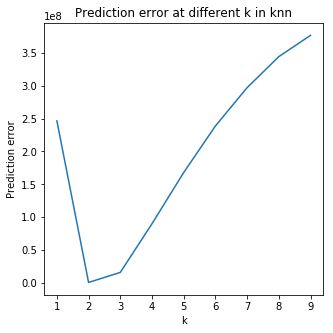

In [212]:
errors = []
ks = range(1,10)
for k in ks:
    error = mse_k(X_train3, X_test3, y_train3, y_test3, k = k, distance ='euclidean',is_regression=True)
    errors.append(error)
plt.xlabel('k')
plt.ylabel('Prediction error')
plt.plot(ks,errors)
plt.title('Prediction error at different k in knn')

## 4) linear to x square large sample

In [294]:
# with larger sample size
train_size = 500
test_size = 50

X_train4 = np.sort(np.random.normal(100, 80, train_size)).reshape(-1,1)
y_train4 = np.array([f1_2(x) for x in X_train4])
X_test4 = np.sort(np.random.normal(100, 80, test_size)).reshape(-1,1)
y_test4 = np.array([f1_2(x) for x in X_test4])

In [295]:
import time
errors = []
times = []
ks = range(1,10)
for k in ks:
    t0 = time.time()
    error = mse_k(X_train4, X_test4, y_train4, y_test4, k = k, distance ='euclidean',is_regression=True)
    t = time.time() - t0
    errors.append(error)
    times.append(t)

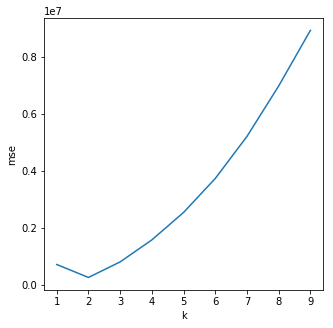

In [296]:
plt.xlabel('k')
plt.ylabel('mse')
plt.plot(ks,errors)

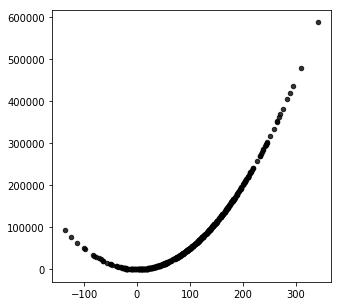

In [297]:
plt.scatter(X_train4, y_train4, c ='black', s=20, alpha=0.8)

# 2. 2-D input with discrete output

In [318]:
train_size = 100
test_size = 20

mean = (100, 100)
cov = [[80, 20], [20, 40]]
X_train5 = np.random.multivariate_normal(mean, cov, (train_size, train_size))[0]
y_train5 = np.array([f2_1(x,100) for x in X_train5])

X_test5 = np.random.multivariate_normal(mean, cov, (test_size, test_size))[0]
y_test5 = np.array([f2_1(x,100) for x in X_test5])

In [351]:
y_pred_test_k51 = knn(X_train5, X_test5, y_train5, k = 1, distance ='euclidean',is_regression=False)

In [352]:
color_train= ['red' if l == 1 else 'blue' for l in y_train5]
color_test= ['red' if l == 1 else 'blue' for l in y_test5]
color_pred_test= ['orange' if l == 1 else 'green' for l in y_pred_test_k51]

Text(0.5, 1.0, '2D input with discrete output red(y=1) blue(y=0) in training data')

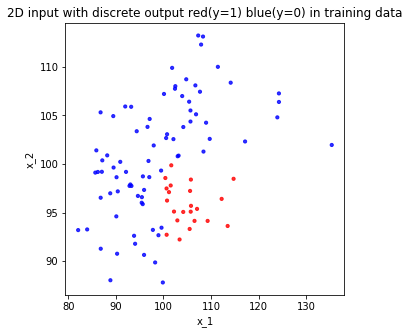

In [380]:
plt.scatter(X_train5[:,0], X_train5[:,1], c = color_train, s=10, alpha=0.8)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('2D input with discrete output red(y=1) blue(y=0) in training data')

Text(0.5, 1.0, 'real output red(y=1) blue(y=0) in testing data')

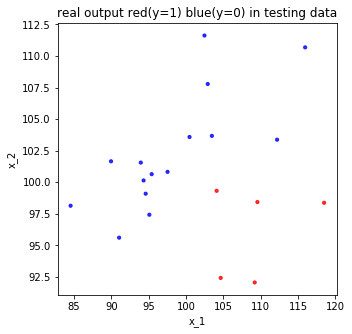

In [381]:
plt.scatter(X_test5[:,0], X_test5[:,1], c = color_test, s=10, alpha=0.8)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('real output red(y=1) blue(y=0) in testing data')

Text(0.5, 1.0, 'prediction orange(y=1) green(y=0) in testing data')

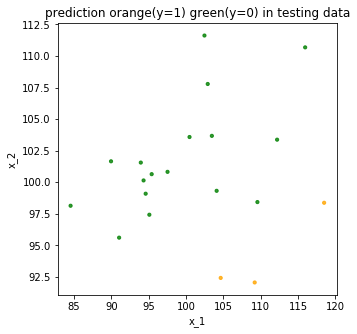

In [382]:
plt.scatter(X_test5[:,0], X_test5[:,1], c = color_pred_test, s=10, alpha=0.8)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('prediction orange(y=1) green(y=0) in testing data')

In [343]:
# highlight misclassified
is_correct_y = np.equal(y_test5.reshape(-1,1),y_pred_test_k51.reshape(-1,1))
is_correct_y.shape

(20, 1)

In [346]:
is_correct_y.sum() # 2 are misclassified

18

In [348]:
color_is_correct= ['black' if l == True else 'red' for l in is_correct_y]

Text(0.5, 1.0, 'red(misclassified) and black(correct classified) in testing data')

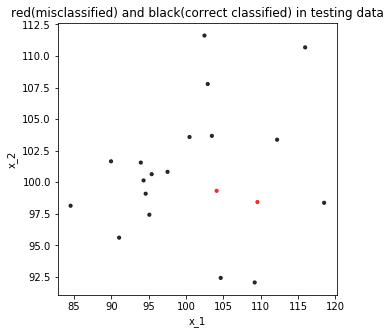

In [366]:
plt.scatter(X_test5[:,0], X_test5[:,1], c = color_is_correct, s=10, alpha=0.8)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('red(misclassified) and black(correct classified) in testing data')